In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/Telco customer.csv')

In [ ]:
data.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
data.shape

(7043, 21)

In [ ]:
data.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
categorical_columns = data.select_dtypes(include=['object','bool']).columns
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

In [ ]:
data.duplicated().sum()

np.int64(0)

In [ ]:
numeric_col = data .select_dtypes(include = np.number).columns.tolist()
numeric_col

['SeniorCitizen', 'tenure', 'MonthlyCharges']

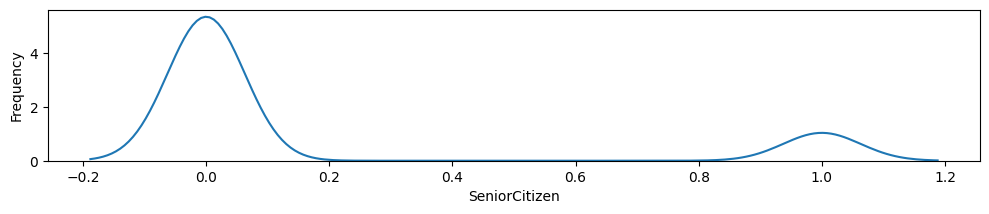

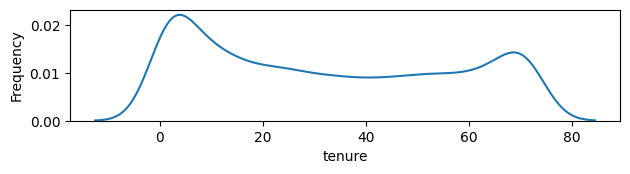

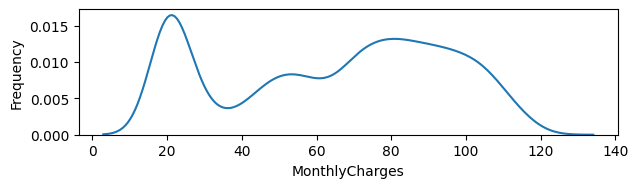

In [ ]:
plt.figure(figsize=(10, 6))
for col in numeric_col:
    plt.subplot(3, 1, numeric_col.index(col) + 1)
    sns.kdeplot(data[col])
    plt.tight_layout()
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

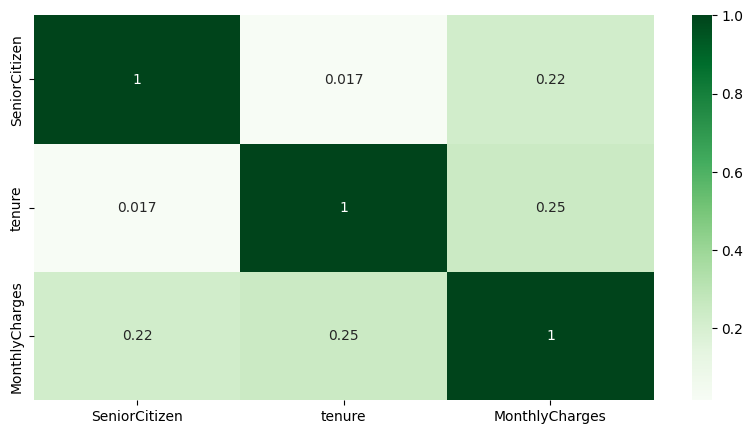

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(data[numeric_col].corr(),annot=True,cmap='Greens')
plt.show()

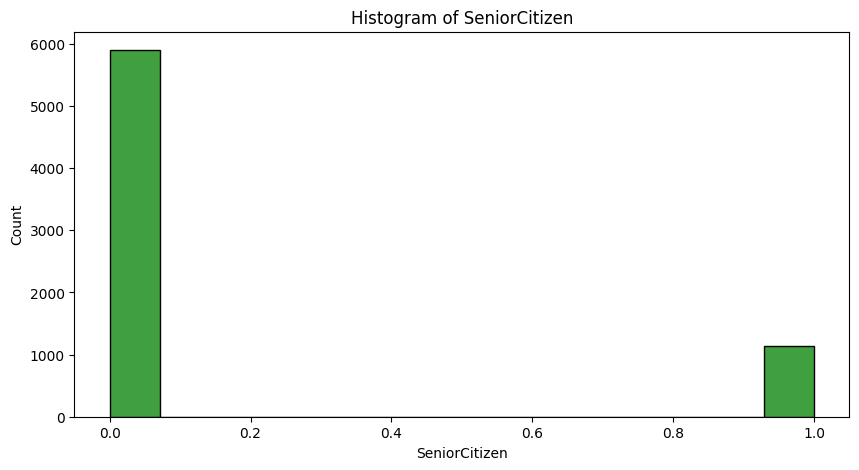

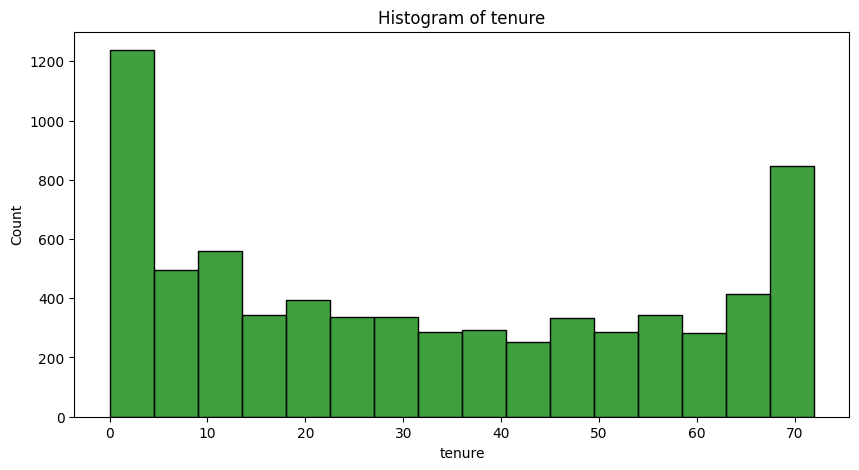

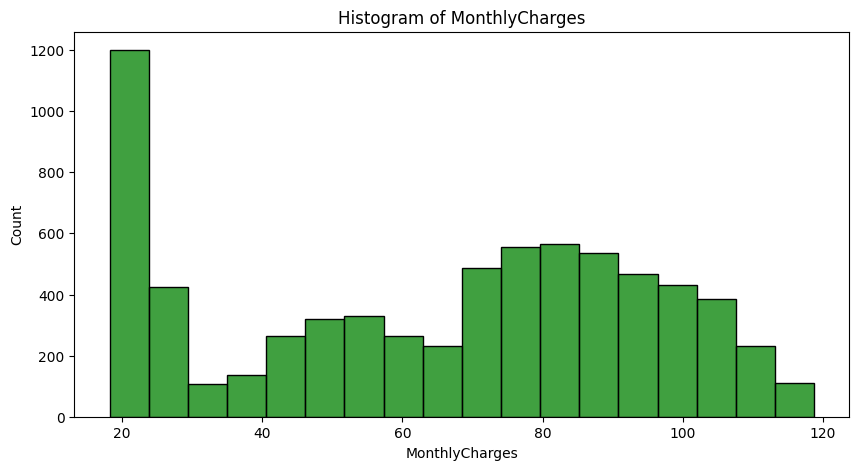

In [ ]:
for column in numerical_columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(data[column], color='green')
    plt.title(f"Histogram of {column}")
    plt.show()

In [ ]:
X = data.drop(columns=['Churn'])
y = data['Churn']

In [ ]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [ ]:
X_train.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
509,1135-LMECX,Female,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.85,19.85
1916,4720-VSTSI,Female,0,No,No,44,Yes,Yes,Fiber optic,No,Yes,Yes,No,No,No,Month-to-month,Yes,Bank transfer (automatic),84.80,3862.55
3390,0621-TSSMU,Male,0,Yes,No,56,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),19.95,1126.75
5388,5515-IDEJJ,Male,0,Yes,Yes,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.90,19.9
6531,4923-ADWXJ,Female,0,No,No,25,Yes,No,DSL,No,Yes,No,Yes,No,Yes,Month-to-month,Yes,Bank transfer (automatic),65.80,1679.65


In [ ]:
X_train

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
509,1135-LMECX,Female,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.85,19.85
1916,4720-VSTSI,Female,0,No,No,44,Yes,Yes,Fiber optic,No,Yes,Yes,No,No,No,Month-to-month,Yes,Bank transfer (automatic),84.80,3862.55
3390,0621-TSSMU,Male,0,Yes,No,56,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),19.95,1126.75
5388,5515-IDEJJ,Male,0,Yes,Yes,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.90,19.9
6531,4923-ADWXJ,Female,0,No,No,25,Yes,No,DSL,No,Yes,No,Yes,No,Yes,Month-to-month,Yes,Bank transfer (automatic),65.80,1679.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5200,6050-IJRHS,Female,0,Yes,Yes,70,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Electronic check,106.50,7397
4066,4872-VXRIL,Male,0,No,No,56,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,One year,Yes,Bank transfer (automatic),64.65,3665.55
3980,8868-WOZGU,Male,0,No,No,28,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,105.70,2979.5
931,0454-OKRCT,Male,0,No,No,33,Yes,No,Fiber optic,No,Yes,No,Yes,No,No,Two year,No,Bank transfer (automatic),80.60,2651.1


In [ ]:
X_test

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
2928,1930-QPBVZ,Male,0,Yes,Yes,68,Yes,No,Fiber optic,Yes,Yes,No,Yes,No,Yes,Two year,No,Bank transfer (automatic),95.10,6683.4
6289,9053-JZFKV,Male,0,No,No,67,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),116.20,7752.3
1644,3331-HQDTW,Female,0,No,No,34,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Mailed check,109.80,3587.25
3518,8393-JMVMB,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.45,19.45
6524,2754-VDLTR,Male,0,No,Yes,10,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Electronic check,95.20,930.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6797,8725-JEDFD,Male,0,No,No,27,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,69.05,1793.25
201,8544-GOQSH,Female,0,No,No,14,Yes,No,Fiber optic,No,Yes,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),80.05,1112.3
1459,3070-BDOQC,Female,0,No,No,60,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Two year,Yes,Electronic check,99.65,5941.05
6667,0872-NXJYS,Female,0,No,No,9,Yes,No,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,79.55,723.4


In [ ]:
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

X_train['TotalCharges'] = pd.to_numeric(X_train['TotalCharges'], errors='coerce')
X_test['TotalCharges'] = pd.to_numeric(X_test['TotalCharges'], errors='coerce')

X_train['TotalCharges'].fillna(X_train['TotalCharges'].mean(), inplace=True)
X_test['TotalCharges'].fillna(X_test['TotalCharges'].mean(), inplace=True)

X_train = X_train.drop(columns=['customerID'])
X_test = X_test.drop(columns=['customerID'])

for col in X_train.select_dtypes(include='object'):
    X_train[col] = encoder.fit_transform(X_train[col])
    X_test[col] = encoder.transform(X_test[col])

/tmp/ipython-input-149-2008924690.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train['TotalCharges'].fillna(X_train['TotalCharges'].mean(), inplace=True)
/tmp/ipython-input-149-2008924690.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].

In [ ]:
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
509,0,0,0,0,1,1,0,2,1,1,1,1,1,1,0,0,3,19.85,19.85
1916,0,0,0,0,44,1,2,1,0,2,2,0,0,0,0,1,0,84.80,3862.55
3390,1,0,1,0,56,1,0,2,1,1,1,1,1,1,1,0,1,19.95,1126.75
5388,1,0,1,1,1,1,0,2,1,1,1,1,1,1,0,0,3,19.90,19.90
6531,0,0,0,0,25,1,0,0,0,2,0,2,0,2,0,1,0,65.80,1679.65


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
k = 5
knn = KNeighborsRegressor(n_neighbors=k)
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [ ]:
from sklearn.svm import SVR

svm_model = SVR()
svm_model.fit(X_train, y_train)

SVR()

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(multi_class='multinomial')
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial')

In [ ]:
%pip install mord

In [ ]:
from mord import LogisticAT

model = LogisticAT()
model.fit(X_train, y_train)

LogisticAT()

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1028
           1       0.63      0.54      0.58       381

    accuracy                           0.79      1409
   macro avg       0.73      0.71      0.72      1409
weighted avg       0.78      0.79      0.78      1409

